In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [2]:
enem = pd.read_csv('train.csv', index_col=0)

In [3]:
enem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,...,5.0,A,A,A,A,A,A,A,B,D
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,...,NaN,A,A,C,A,B,A,A,C,A
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,...,NaN,A,A,A,A,C,A,A,B,A
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,...,5.0,C,A,A,A,A,D,A,A,A
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,...,NaN,A,A,A,A,A,A,A,A,A


O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o [Dicionário dos Microdados do Enem 2016](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip).

Alguns estudantes decidem realizar prova do ENEM de forma precoce, como um teste (coluna IN_TREINEIRO). Neste desafio, você deve criar um modelo de classificação binária para inferir a mesma. Os resultados possíveis da sua resposta devem ser “0” ou “1”.

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: `NU_INSCRICAO` e `IN_TREINEIRO`.

In [4]:
# Temos dados desbalanceados
enem['IN_TREINEIRO'].value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

In [5]:
colunas = ['NU_IDADE', 'TP_ST_CONCLUSAO', 'Q026', 'IN_TREINEIRO']

In [6]:
df = enem[colunas].copy()

In [8]:
df2 = pd.get_dummies(df, prefix=['Q026'])
df2.head()

,NU_IDADE,TP_ST_CONCLUSAO,IN_TREINEIRO,Q026_A,Q026_B,Q026_C
1,24,1,0,0,0,1
2,17,2,0,1,0,0
3,21,3,0,1,0,0
4,25,1,0,0,0,1
5,28,1,0,0,1,0


In [9]:
smote = SMOTE()

X_smote, y_smote = smote.fit_resample(df2.drop(['IN_TREINEIRO'], axis=1), df2.IN_TREINEIRO)

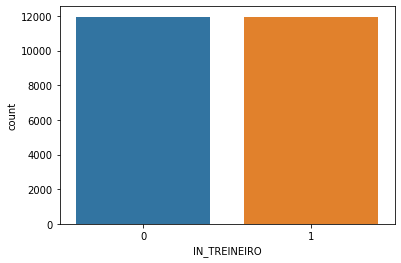

In [10]:
np.bincount(y_smote)

ax = sns.countplot(x=y_smote)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_smote,
                                                    y_smote,
                                                    test_size=0.3,
                                                    random_state=1)

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = knn.predict(X_test)

In [15]:
print(metrics.accuracy_score(y_test, y_pred))

0.9907936950760218


In [16]:
# Olhando para os acertos para cada classe
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3632
           1       0.98      1.00      0.99      3537

    accuracy                           0.99      7169
   macro avg       0.99      0.99      0.99      7169
weighted avg       0.99      0.99      0.99      7169



In [17]:
# Importando os dados de teste
df_test = pd.read_csv('test.csv')

In [21]:
colunas_test = ['NU_IDADE', 'TP_ST_CONCLUSAO', 'Q026']

In [22]:
df_test[colunas_test]

,NU_IDADE,TP_ST_CONCLUSAO,Q026
0,19,1,C
1,24,1,C
2,16,3,A
3,17,2,B
4,19,1,B
...,...,...,...
4565,17,2,A
4566,20,1,C
4567,22,1,B
4568,19,2,A


In [26]:
df3 = pd.get_dummies(df_test[colunas_test], prefix='Q026')
df3.head()

,NU_IDADE,TP_ST_CONCLUSAO,Q026_A,Q026_B,Q026_C
0,19,1,0,0,1
1,24,1,0,0,1
2,16,3,1,0,0
3,17,2,0,1,0
4,19,1,0,1,0


In [28]:
df_test['IN_TREINEIRO'] = knn.predict(df3)
df_test[['NU_INSCRICAO', 'IN_TREINEIRO']].head()

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0


In [29]:
df_result = df_test[['NU_INSCRICAO', 'IN_TREINEIRO']].copy()

In [31]:
df_result.to_csv(r'/home/guilherme/codenation/enem-4/answer.csv', index=False)